# Import necessary Libraries

In [7]:
import pandas as pd
import os;

#### Merging 12 motnths of sales data in Single file

In [48]:
df= pd.read_csv("Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df= pd.read_csv("Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning Data

#### Remove all Rows with NA Value

In [51]:
all_months_data.dropna(how = 'all',inplace = True)

#### Drop all the headers that where preset in middle of Data after concatination

In [64]:
filter=all_months_data[all_months_data['Order ID'].str.contains('Order ID')]
all_months_data.drop(filter.index, inplace = True)

#### Exporting it in CSV

In [69]:
all_months_data.to_csv("all_data.csv",index = False)

In [70]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Question 1 -> What was the Best Month of Sale? How Much was earned that Month?

##### Extracted month from Order Date column

##### Added Sales column 

In [139]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype(int)
all_data['Sale'] = all_data['Quantity Ordered'] * all_data['Price Each']


###### Group by Month

In [146]:
results= all_data.groupby('Month').sum()[['Sale', 'Quantity Ordered','Price Each']]

#### Plotting Data in graph

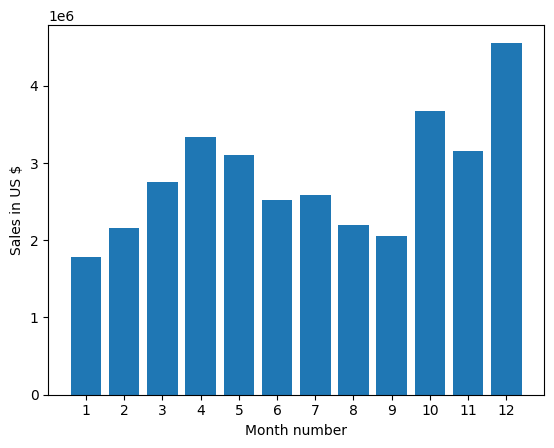

In [149]:
import matplotlib.pyplot as plt
months = range(1 , 13)
plt.bar(months,results['Sale'])
plt.xticks(months)
plt.ylabel('Sales in US $')
plt.xlabel('Month number')
plt.show()

### Question -> Which City Has the highest number of  sales

#### Extract and add city column

In [162]:
cities=[(city.split(',')[-2].strip()) for city in all_data['Purchase Address']]
all_data['City'] = cities
all_data

#this is another apporach to extract 
# all_data['City'] =all_data['Purchase Address'].apply(lambda x:x.split(',')[1])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
182730,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
182731,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
182732,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
182733,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [168]:
res = all_data.groupby('City').sum()[['Sale']]
res

,Sale
City,
Atlanta,2741642.05
Austin,1786745.52
Boston,3604080.86
Dallas,2717793.72
Los Angeles,5354039.93
New York City,4581658.91
Portland,2276649.24
San Francisco,8124120.94
Seattle,2693048.60


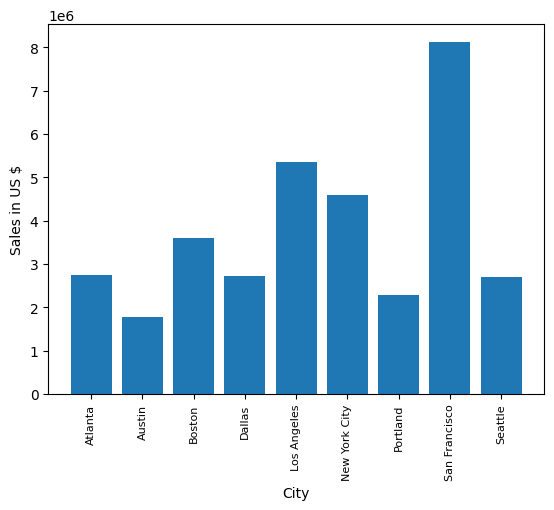

In [170]:
import matplotlib.pyplot as plt
cities = res.index
plt.bar(cities,res['Sale'])
plt.xticks(cities,rotation = 'vertical',size = 8)
plt.ylabel('Sales in US $')
plt.xlabel('City')
plt.show()

### Question -> At What time should we display AD to maximize the Sales

In [174]:
all_data ['Order Date'] = pd.to_datetime(all_data['Order Date'],format = '%m/%d/%Y %H:%M:%S')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [175]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

<function matplotlib.pyplot.show(close=None, block=None)>

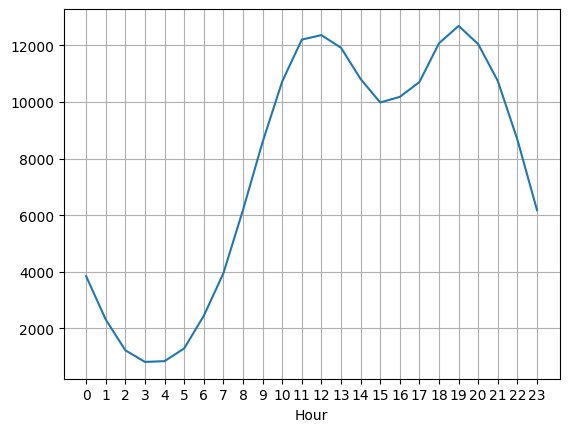

In [192]:
r = all_data.groupby('Hour').count()['Sale']
r
plt.plot(r.index,r)
plt.xticks(r.index)
plt.xlabel('Hour')
plt.grid()
plt.show

### Question -> What products are most sold together

In [213]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\Santosh\AppData\Local\Temp\ipykernel_10156\3051753144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [224]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    rowlist = row.split(',')
    count.update(Counter(combinations(rowlist,2)))

for key, value in count.most_common(10):
    print(key , value)

('iPhone', 'Lightning Charging Cable') 973
('Google Phone', 'USB-C Charging Cable') 954
('iPhone', 'Wired Headphones') 437
('Google Phone', 'Wired Headphones') 401
('Vareebadd Phone', 'USB-C Charging Cable') 348
('iPhone', 'Apple Airpods Headphones') 343
('Google Phone', 'Bose SoundSport Headphones') 219
('USB-C Charging Cable', 'Wired Headphones') 156
('Vareebadd Phone', 'Wired Headphones') 141
('Lightning Charging Cable', 'Wired Headphones') 92


### Question ->What product sold the most? why do you think it sold most

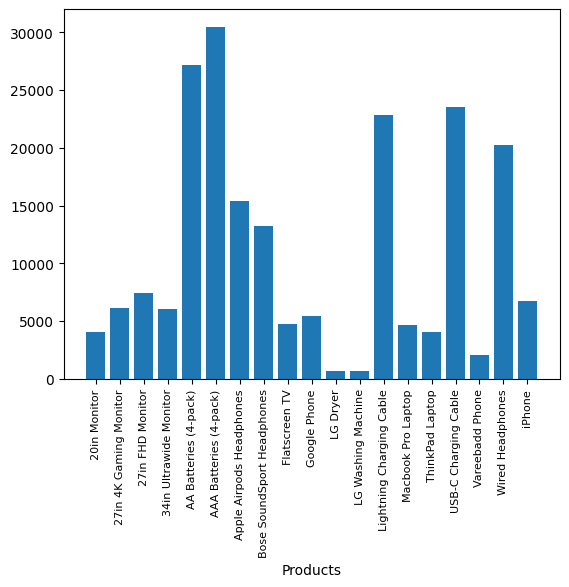

In [237]:
product_obj = all_data.groupby('Product')
quntity_ordered = product_obj.sum()['Quantity Ordered']

plt.bar(quntity_ordered.index, quntity_ordered)
plt.xticks(quntity_ordered.index , rotation= 'vertical',size = 8)
plt.xlabel('Products')
plt.show()

### Overlay 2 graphs

C:\Users\Santosh\AppData\Local\Temp\ipykernel_10156\666846962.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(quntity_ordered.index,rotation='vertical' ,size = 8)


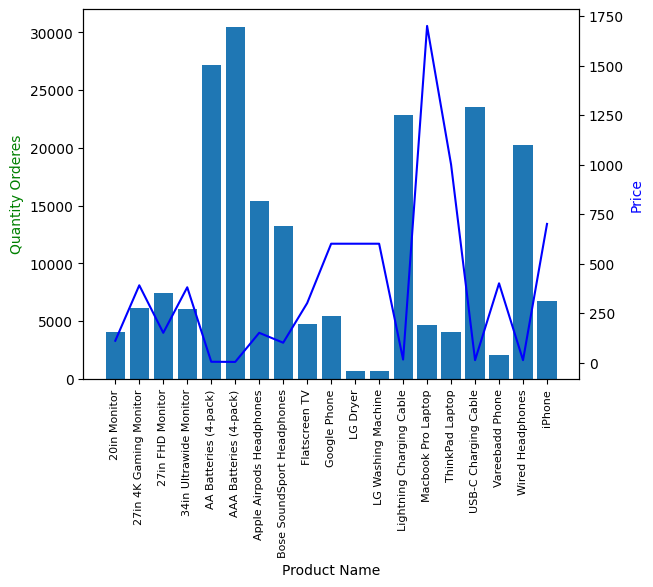

In [243]:
prices = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(quntity_ordered.index, quntity_ordered)
ax2.plot(quntity_ordered.index, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Orderes', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(quntity_ordered.index,rotation='vertical' ,size = 8)

plt.show()